<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [66]:
# Load Boston housing dataset
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.utils import normalize

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [68]:
# Normalzie the data
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [72]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

np.random.seed(812)

model = Sequential()

# Input Layer
model.add(Dense(16, input_dim=13, activation='relu'))

# Hidden Layer
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='linear'))

# Output Layer
model.add(Dense(1, activation='linear'))

# Compile
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 56        
_________________________________________________________________
dense_60 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 5         
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Hyper parameter
batch_size = 32
epochs = 1000

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=0)
# validation_split - reserve some data from dataset
# verbose shows the print statements
scores = model.evaluate(x_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]}')

102/102 [==============================] - 0s 59us/sample - loss: 30.4164 - mean_squared_error: 30.4164
mean_squared_error: 30.416444778442383


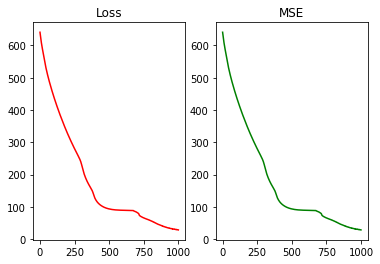

In [62]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2)) = plt.subplots(1,2)
ax1.plot(history.history['loss'], color = 'r')
ax1.set_title("Loss")
ax2.plot(history.history['mean_squared_error'], color = 'g')
ax2.set_title("MSE");

In [69]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate Model
lr_model = LinearRegression()

# Fit model
lr_model.fit(x_train, y_train)

# Predict
y_pred = lr_model.predict(x_test)

# Accuracy
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE:  18.16551049349648


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [122]:
# Load bonston housing dataset
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import normalize

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [123]:
# Hyper Parameters
batch_size = 32
num_classes = 10
epochs = 100

In [124]:
# Reshape the data (28*28 = 784)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# X Variable Types
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# one-hot encode category labels for softmax
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

np.random.seed(812)

model = Sequential()

# Input Layer
model.add(Dense(16, input_dim=784, kernel_initializer='normal', activation='relu'))

# Hidden Layer
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='relu'))

# Output Layer
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=0)
# validation_split - reserve some data from dataset
# verbose shows the print statements
scores = model.evaluate(x_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

In [125]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=model, epochs=epochs, batch_size=batch_size, verbose=0)
# Cross Validatoin
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

TypeError: can't pickle _thread.RLock objects

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.